In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 10:42:17,097] A new study created in memory with name: no-name-6b108241-fa20-42ca-b2c2-fd28b6fba4cf
[I 2025-04-27 10:42:19,922] Trial 0 finished with value: 0.9476027397260273 and parameters: {'n_estimators': 736, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.9476027397260273.
[I 2025-04-27 10:42:21,004] Trial 1 finished with value: 0.9612252663622527 and parameters: {'n_estimators': 268, 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.9612252663622527.
[I 2025-04-27 10:42:21,838] Trial 2 finished with value: 0.950152207001522 and parameters: {'n_estimators': 192, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9612252663622527.
[I 2025-04-27 10:42:24,516] Trial 3 finished with value: 0.9448630136986302 and parameters: {'n_estimators': 649, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 13}. Best is trial 1 with valu

Best trial:
Accuracy: 0.9669710806697107
Best hyperparameters:  {'n_estimators': 322, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 4}


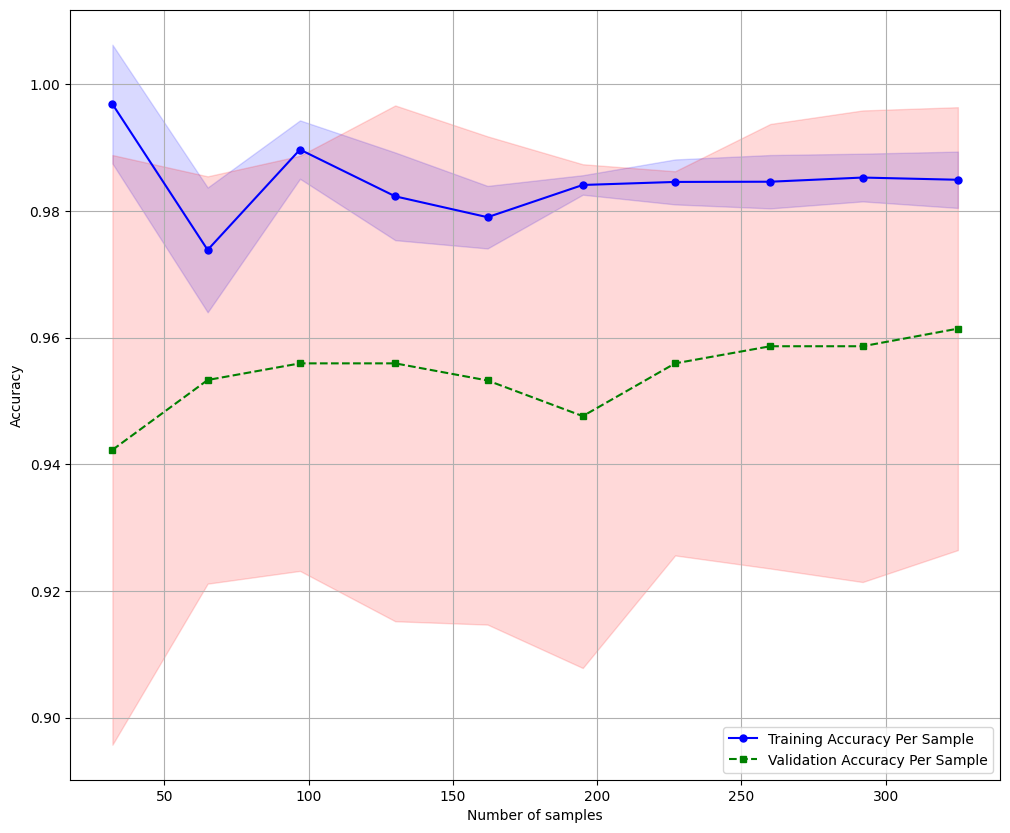

Confusion Matrix
[[ 55   9]
 [  1 106]]
Accuracy: 0.9415, Precision: 0.9217, Recall: 0.9907, F1: 0.9550, AUC: 0.9902


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', outlier_params)

helper.train_and_evaluate_model('rf', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)